In [113]:
# Import libraries
import pandas as pd
import numpy as np
import holidays
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import pickle



In [29]:
# Load the data
df_22 = pd.read_pickle(r'D:\capstone_F24\data\Cleaned_data\df_filled_22.pkl')
df_23 = pd.read_pickle(r'D:\capstone_F24\data\Cleaned_data\df_filled_23.pkl')


In [30]:
# Merge the two dataframes
df = pd.concat([df_22, df_23], axis=0)


In [31]:
# View the first few rows of the dataframe
df.sample(5)


timestamp,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,...,2023-12-31 14:00:00,2023-12-31 15:00:00,2023-12-31 16:00:00,2023-12-31 17:00:00,2023-12-31 18:00:00,2023-12-31 19:00:00,2023-12-31 20:00:00,2023-12-31 21:00:00,2023-12-31 22:00:00,2023-12-31 23:00:00
station_complex_id,,,,,,,,,,,,,,,,,,,,,
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,91.0,77.0,70.0,78.0,56.0,37.0,33.0,12.0,8.0
375,6.0,0.0,1.0,3.0,9.0,40.0,84.0,119.0,112.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,180.0,138.0,186.0,196.0,268.0,223.0,200.0,152.0,48.0
126,16.0,2.0,1.0,3.0,17.0,64.0,142.0,217.0,236.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,32.0,27.0,33.0,29.0,20.0,25.0,25.0,31.0,8.0


In [32]:
# Reset the index
df.reset_index(inplace=True)


In [ ]:
# Convert to long format
df_long = df.melt(id_vars='station_complex_id', var_name='timestamp', value_name='ridership')


In [ ]:
# View the first few rows of the dataframe and shape
display(df_long.sample(5))
df_long.shape

,station_complex_id,timestamp,ridership
6935401,416,2023-04-08 05:00:00,65.0
4482804,453,2022-10-17 16:00:00,NaN
3101185,372,2022-07-29 23:00:00,18.0
5935545,76,2023-02-09 12:00:00,191.0
617203,44,2022-03-08 14:00:00,NaN


(11575104, 3)

In [ ]:
# Convert the timestamp to datetime
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])


In [ ]:
# Sort the dataframe
df_long.sort_values(['station_complex_id', 'timestamp'], inplace=True)


In [ ]:
# Reset the index
df_long.reset_index(drop=True, inplace=True)


In [ ]:
# View the first few rows of the dataframe
display(df_long.head(10))


,station_complex_id,timestamp,ridership
0,1,2022-02-01 00:00:00,17.0
1,1,2022-02-01 00:00:00,NaN
2,1,2022-02-01 01:00:00,5.0
3,1,2022-02-01 01:00:00,NaN
4,1,2022-02-01 02:00:00,6.0
5,1,2022-02-01 02:00:00,NaN
6,1,2022-02-01 03:00:00,12.0
7,1,2022-02-01 03:00:00,NaN
8,1,2022-02-01 04:00:00,44.0
9,1,2022-02-01 04:00:00,NaN


In [ ]:
# Sort the DataFrame so that the rows without NaN in ridership are first
df_long.sort_values(by=['station_complex_id', 'timestamp', 'ridership'], ascending=[True, True, False], inplace=True)

# Drop duplicates based on station_complex_id and timestamp, keeping the first non-NaN ridership
df_long.drop_duplicates(subset=['station_complex_id', 'timestamp'], keep='first', inplace=True)

# Display the updated DataFrame
print("Data shape after dropping NaNs in duplicates:", df_long.shape)
display(df_long.head(10))


Data shape after dropping NaNs in duplicates: (5787552, 3)


,station_complex_id,timestamp,ridership
0,1,2022-02-01 00:00:00,17.0
2,1,2022-02-01 01:00:00,5.0
4,1,2022-02-01 02:00:00,6.0
6,1,2022-02-01 03:00:00,12.0
8,1,2022-02-01 04:00:00,44.0
10,1,2022-02-01 05:00:00,143.0
12,1,2022-02-01 06:00:00,405.0
14,1,2022-02-01 07:00:00,735.0
16,1,2022-02-01 08:00:00,950.0
18,1,2022-02-01 09:00:00,512.0


In [ ]:
# view the info of the dataframe
df_long.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5787552 entries, 0 to 11575103
Data columns (total 3 columns):
 #   Column              Dtype         
---  ------              -----         
 0   station_complex_id  object        
 1   timestamp           datetime64[ns]
 2   ridership           float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 176.6+ MB


In [ ]:
# Check for missing values
print(df_long.isnull().sum())
df_long.head(10)


station_complex_id    0
timestamp             0
ridership             0
dtype: int64


,station_complex_id,timestamp,ridership
0,1,2022-02-01 00:00:00,17.0
2,1,2022-02-01 01:00:00,5.0
4,1,2022-02-01 02:00:00,6.0
6,1,2022-02-01 03:00:00,12.0
8,1,2022-02-01 04:00:00,44.0
10,1,2022-02-01 05:00:00,143.0
12,1,2022-02-01 06:00:00,405.0
14,1,2022-02-01 07:00:00,735.0
16,1,2022-02-01 08:00:00,950.0
18,1,2022-02-01 09:00:00,512.0


In [ ]:
# Extract the hour, day of the week, month, and weekend
df_long['hour'] = df_long['timestamp'].dt.hour
df_long['day_of_week'] = df_long['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df_long['month'] = df_long['timestamp'].dt.month
df_long['is_weekend'] = df_long['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
df_long.sample(5)

,station_complex_id,timestamp,ridership,hour,day_of_week,month,is_weekend
8854624,463,2022-05-15 08:00:00,24.0,8,6,5,1
6634295,383,2023-10-31 11:00:00,157.0,11,1,10,0
1467649,17,2023-08-02 00:00:00,107.0,0,2,8,0
199660,120,2022-07-02 14:00:00,1315.0,14,5,7,1
5371245,345,2023-02-11 22:00:00,216.0,22,5,2,1


In [47]:
# Use Holidays library to get the US holidays
us_holidays = holidays.US()

In [ ]:
# Create a new column for holidays
df_long['holiday'] = df_long['timestamp'].apply(lambda x: x in us_holidays).astype(int)


In [ ]:
# Add holiday names
df_long['holiday_name'] = df_long['timestamp'].apply(lambda x: us_holidays.get(x)).fillna('No Holiday')

In [ ]:
display(df_long.sample(5))
df_long.info()

,station_complex_id,timestamp,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name
822095,147,2023-05-04 23:00:00,29.0,23,3,5,0,0,No Holiday
5623906,352,2022-10-23 17:00:00,70.0,17,6,10,1,0,No Holiday
6034926,365,2022-06-24 15:00:00,208.0,15,4,6,0,0,No Holiday
10793255,67,2023-04-19 11:00:00,128.0,11,2,4,0,0,No Holiday
10463742,626,2022-09-15 15:00:00,955.0,15,3,9,0,0,No Holiday


<class 'pandas.core.frame.DataFrame'>
Index: 5787552 entries, 0 to 11575103
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   station_complex_id  object        
 1   timestamp           datetime64[ns]
 2   ridership           float64       
 3   hour                int32         
 4   day_of_week         int32         
 5   month               int32         
 6   is_weekend          int64         
 7   holiday             int64         
 8   holiday_name        object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(2)
memory usage: 375.3+ MB


In [ ]:
# Set the timestamp as the index
df_long.set_index('timestamp', inplace=True)

In [66]:
# Make a copy of the dataframe to use for the next steps
df_long_copy_1 = df_long.copy()

In [67]:
# Create lag features
df_long_copy_1['ridership_lag_1'] = df_long_copy_1.groupby('station_complex_id')['ridership'].shift(1)
df_long_copy_1['ridership_lag_3'] = df_long_copy_1.groupby('station_complex_id')['ridership'].shift(3)
df_long_copy_1['ridership_lag_7'] = df_long_copy_1.groupby('station_complex_id')['ridership'].shift(7)
df_long_copy_1['ridership_lag_24'] = df_long_copy_1.groupby('station_complex_id')['ridership'].shift(24)
df_long_copy_1['rolling_mean_6h'] = df_long_copy_1.groupby('station_complex_id')['ridership'].transform(lambda x: x.rolling(window=6).mean())
df_long_copy_1['rolling_std_6h'] = df_long_copy_1.groupby('station_complex_id')['ridership'].transform(lambda x: x.rolling(window=6).std())

In [68]:
# View the first few rows of the dataframe
display(df_long_copy_1.head(10))

,station_complex_id,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name,ridership_lag_1,ridership_lag_3,ridership_lag_7,ridership_lag_24,rolling_mean_6h,rolling_std_6h
timestamp,,,,,,,,,,,,,,
2022-02-01 00:00:00,1,17.0,0,1,2,0,0,No Holiday,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 01:00:00,1,5.0,1,1,2,0,0,No Holiday,17.0,NaN,NaN,NaN,NaN,NaN
2022-02-01 02:00:00,1,6.0,2,1,2,0,0,No Holiday,5.0,NaN,NaN,NaN,NaN,NaN
2022-02-01 03:00:00,1,12.0,3,1,2,0,0,No Holiday,6.0,17.0,NaN,NaN,NaN,NaN
2022-02-01 04:00:00,1,44.0,4,1,2,0,0,No Holiday,12.0,5.0,NaN,NaN,NaN,NaN
2022-02-01 05:00:00,1,143.0,5,1,2,0,0,No Holiday,44.0,6.0,NaN,NaN,37.833333,53.461824
2022-02-01 06:00:00,1,405.0,6,1,2,0,0,No Holiday,143.0,12.0,NaN,NaN,102.500000,157.211641
2022-02-01 07:00:00,1,735.0,7,1,2,0,0,No Holiday,405.0,44.0,17.0,NaN,224.166667,291.654190
2022-02-01 08:00:00,1,950.0,8,1,2,0,0,No Holiday,735.0,143.0,5.0,NaN,381.500000,388.851000


In [ ]:
# Apply backfill to fill NaN values where possible
df_long_copy_1.bfill(inplace=True)

# Apply forward fill again to ensure no NaN values remain
df_long_copy_1.ffill(inplace=True)

# Check DF for missing values
print("Data shape after backfill and forward filling NaNs:", df_long_copy_1.shape)
display(df_long_copy_1.head(10))


Data shape after backfill and forward filling NaNs: (5787552, 14)


,station_complex_id,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name,ridership_lag_1,ridership_lag_3,ridership_lag_7,ridership_lag_24,rolling_mean_6h,rolling_std_6h
timestamp,,,,,,,,,,,,,,
2022-02-01 00:00:00,1,17.0,0,1,2,0,0,No Holiday,17.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 01:00:00,1,5.0,1,1,2,0,0,No Holiday,17.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 02:00:00,1,6.0,2,1,2,0,0,No Holiday,5.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 03:00:00,1,12.0,3,1,2,0,0,No Holiday,6.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 04:00:00,1,44.0,4,1,2,0,0,No Holiday,12.0,5.0,17.0,17.0,37.833333,53.461824
2022-02-01 05:00:00,1,143.0,5,1,2,0,0,No Holiday,44.0,6.0,17.0,17.0,37.833333,53.461824
2022-02-01 06:00:00,1,405.0,6,1,2,0,0,No Holiday,143.0,12.0,17.0,17.0,102.500000,157.211641
2022-02-01 07:00:00,1,735.0,7,1,2,0,0,No Holiday,405.0,44.0,17.0,17.0,224.166667,291.654190
2022-02-01 08:00:00,1,950.0,8,1,2,0,0,No Holiday,735.0,143.0,5.0,17.0,381.500000,388.851000


In [ ]:
# Count of null values
df_long_copy_1.isnull().sum()

station_complex_id    0
ridership             0
hour                  0
day_of_week           0
month                 0
is_weekend            0
holiday               0
holiday_name          0
ridership_lag_1       0
ridership_lag_3       0
ridership_lag_7       0
ridership_lag_24      0
rolling_mean_6h       0
rolling_std_6h        0
dtype: int64

In [90]:
# create a copy of the dataframe
df_long_copy_2 = df_long_copy_1.copy()
df_long_copy_2.head(5)

,station_complex_id,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name,ridership_lag_1,ridership_lag_3,ridership_lag_7,ridership_lag_24,rolling_mean_6h,rolling_std_6h
timestamp,,,,,,,,,,,,,,
2022-02-01 00:00:00,1,17.0,0,1,2,0,0,No Holiday,17.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 01:00:00,1,5.0,1,1,2,0,0,No Holiday,17.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 02:00:00,1,6.0,2,1,2,0,0,No Holiday,5.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 03:00:00,1,12.0,3,1,2,0,0,No Holiday,6.0,17.0,17.0,17.0,37.833333,53.461824
2022-02-01 04:00:00,1,44.0,4,1,2,0,0,No Holiday,12.0,5.0,17.0,17.0,37.833333,53.461824


In [135]:
# Export to csv
df_long_copy_2.to_csv(r'D:\capstone_F24\data\Cleaned_data\ridership_w_lag.csv', index=True)

In [ ]:
# merge the weather data here
weather = pd.read_csv(r'D:\capstone_F24\data\Cleaned_data\weather.csv')

In [91]:
# Feature columns and target column train-test split
feature_cols = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'holiday', 'ridership_lag_1', 'ridership_lag_3', 'ridership_lag_7', 'ridership_lag_24', 'rolling_mean_6h', 'rolling_std_6h'
]
target_col = 'ridership'

train = df_long_copy_2[df_long_copy_2.index.year == 2022]
test = df_long_copy_2[df_long_copy_2.index.year == 2023]

print("Train end:", train.index[-1])
print("Test start:", test.index[0])

X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]
y_test = test[target_col]


Train end: 2022-12-31 23:00:00
Test start: 2023-02-01 00:00:00


In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_cols, index=X_test.index)


In [93]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=24)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)


Random Forest MSE: 8664.390955250523


In [94]:
# Feature importances
importances = rf_model.feature_importances_
for feature, importance in zip(feature_cols, importances):
    print(f"{feature}: {importance:.4f}")


hour: 0.0235
day_of_week: 0.0058
month: 0.0008
is_weekend: 0.0010
holiday: 0.0001
ridership_lag_1: 0.7962
ridership_lag_3: 0.0132
ridership_lag_7: 0.0087
ridership_lag_24: 0.1063
rolling_mean_6h: 0.0107
rolling_std_6h: 0.0336


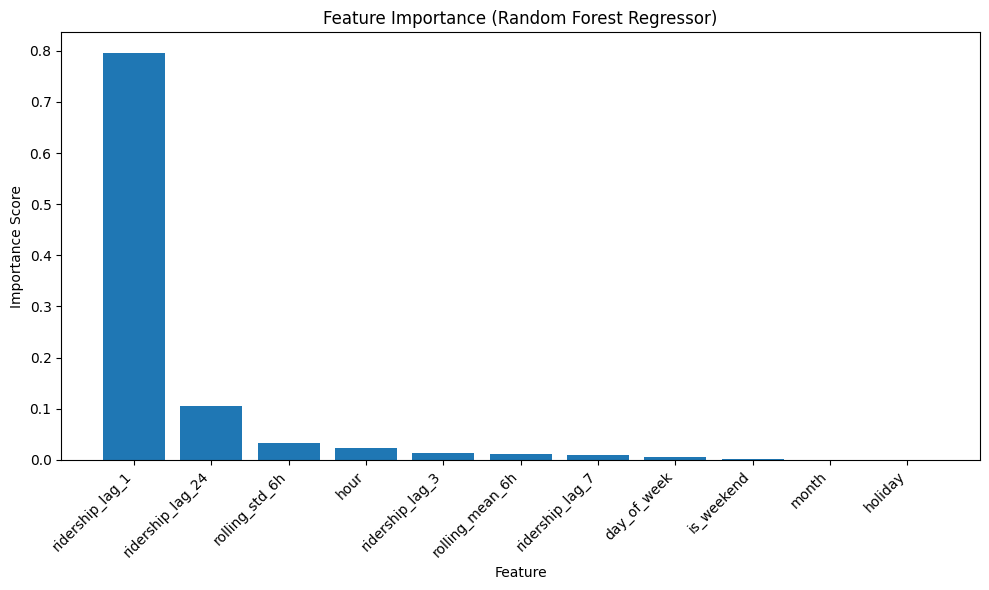

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Sort the importances in descending order along with corresponding feature names
indices = np.argsort(importances)[::-1]
sorted_features = [feature_cols[i] for i in indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest Regressor)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha='right')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted_rf': y_pred_rf
}, index=y_test.index)


In [ ]:
results_df.sample(10)


,actual,predicted_rf
timestamp,,
2023-10-04 23:00:00,147.0,259.08
2023-11-08 00:00:00,1557.0,1333.98
2023-03-12 20:00:00,356.0,411.85
2023-05-09 05:00:00,813.0,805.79
2023-05-22 04:00:00,8.0,6.09
2023-08-03 15:00:00,1032.0,1034.84
2023-09-27 15:00:00,347.0,364.59
2023-07-02 09:00:00,217.0,212.79
2023-05-04 08:00:00,882.0,894.65


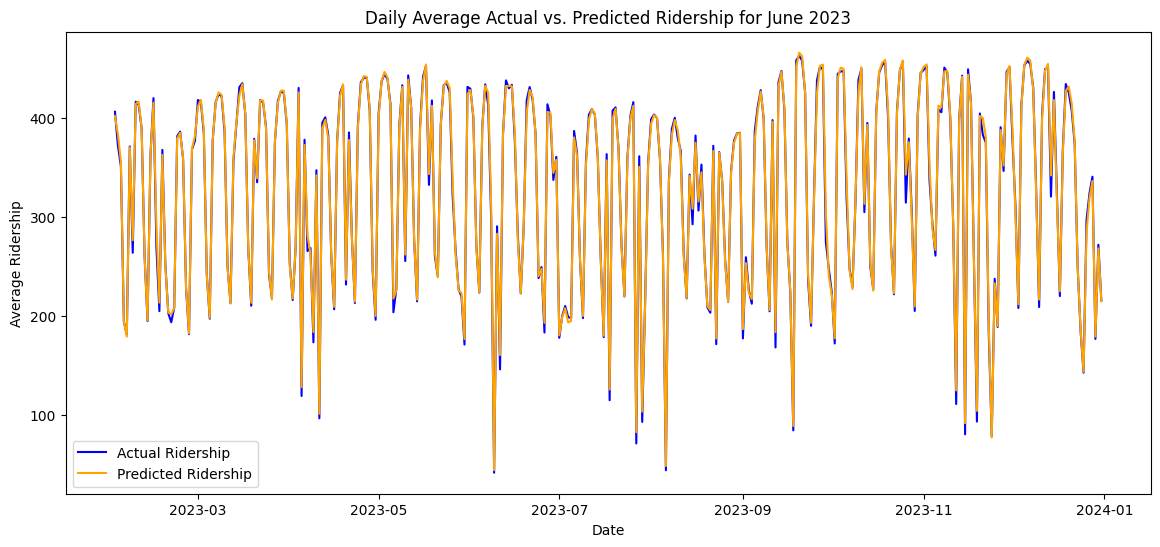

In [ ]:
# Resample the data to daily frequency
june_2022_daily_df = results_df.resample('D').mean()

# Plot the actual vs predicted ridership
plt.figure(figsize=(14, 6))
plt.plot(june_2022_daily_df.index, june_2022_daily_df['actual'], label='Actual Ridership', color='blue')
plt.plot(june_2022_daily_df.index, june_2022_daily_df['predicted_rf'], label='Predicted Ridership', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Ridership')
plt.title('Daily Average Actual vs. Predicted Ridership for June 2023')
plt.legend()
plt.show()


In [ ]:
# Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=5)

# create empty list to store the MSE scores
mse_scores = []

# Loop through the splits
for train_index, val_index in tscv.split(X_train):
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=24)
    rf_model.fit(X_train_split, y_train_split)

    y_val_pred = rf_model.predict(X_val_split)

    mse = mean_squared_error(y_val_split, y_val_pred)
    mse_scores.append(mse)
    print(f"Validation MSE for split: {mse}")

print("Average Validation MSE across splits:", np.mean(mse_scores))


Validation MSE for split: 9783.774597099087
Validation MSE for split: 3020.363168920909
Validation MSE for split: 2058.2088255177487
Validation MSE for split: 8101.896473523431
Validation MSE for split: 50144.38400733938
Average Validation MSE across splits: 14621.725414480112


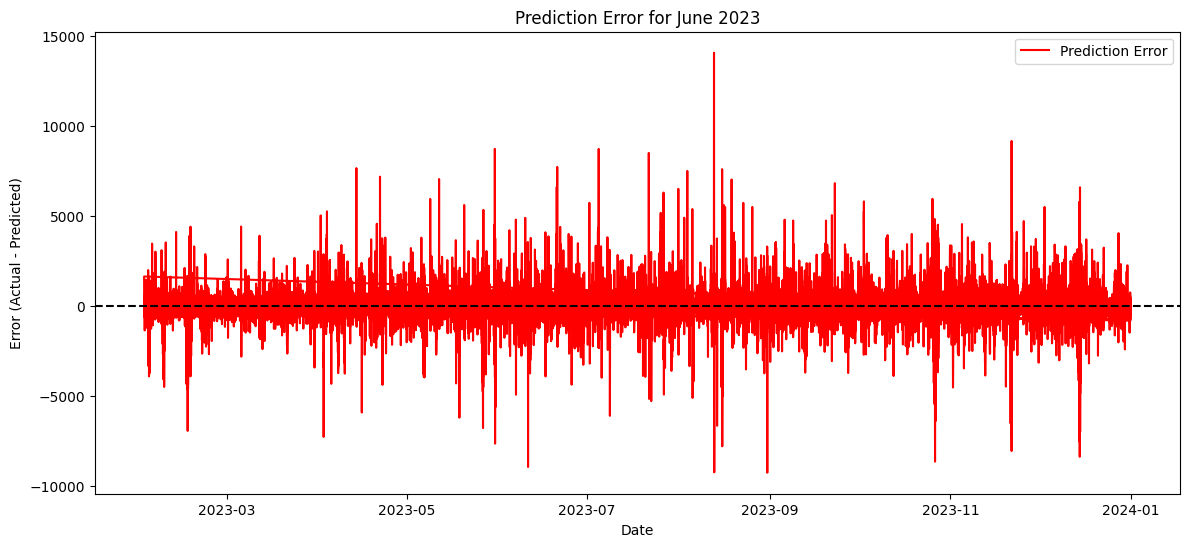

In [ ]:
# Plot the prediction error
results_df['error'] = results_df['actual'] - results_df['predicted_rf']

plt.figure(figsize=(14, 6))
plt.plot(results_df.index, results_df['error'], label='Prediction Error', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Error for June 2023')
plt.legend()
plt.show()


Linear Regression MSE: 44697.81777217266


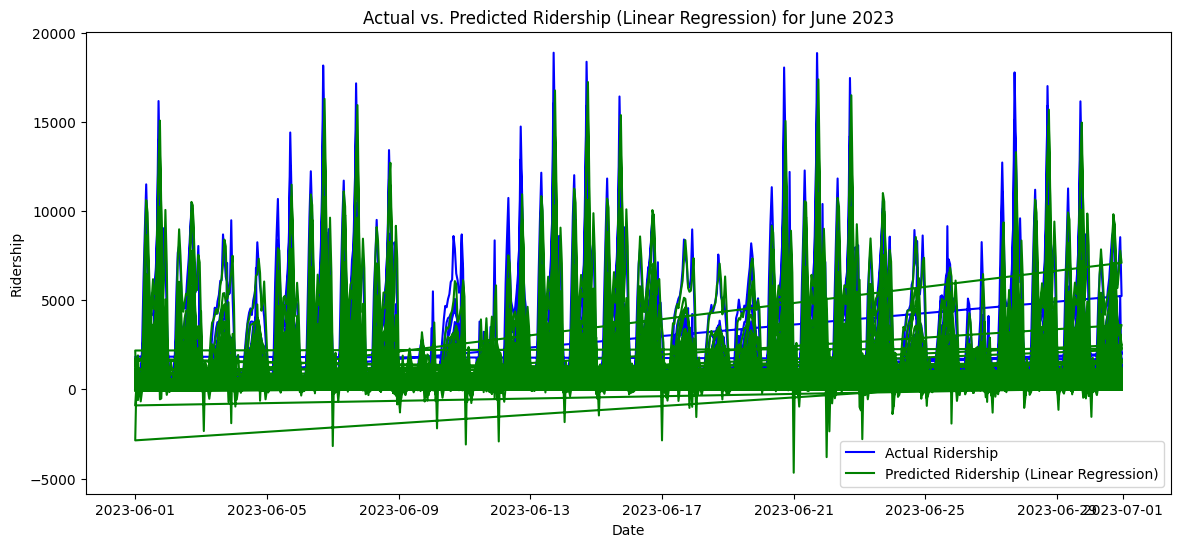

In [111]:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

results_lr_df = pd.DataFrame({'actual': y_test, 'predicted_lr': y_pred_lr}, index=y_test.index)
june_2023_lr_df = results_lr_df[(results_lr_df.index >= '2023-06-01') & (results_lr_df.index < '2023-07-01')]

plt.figure(figsize=(14, 6))
plt.plot(june_2023_lr_df.index, june_2023_lr_df['actual'], label='Actual Ridership', color='blue')
plt.plot(june_2023_lr_df.index, june_2023_lr_df['predicted_lr'], label='Predicted Ridership (Linear Regression)', color='green')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.title('Actual vs. Predicted Ridership (Linear Regression) for June 2023')
plt.legend()
plt.show()


In [116]:
feature_cols = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'holiday', 'ridership_lag_1', 'ridership_lag_3', 'ridership_lag_7', 'ridership_lag_24', 'rolling_mean_6h', 'rolling_std_6h'
]
target_col = 'ridership'

In [117]:
# Adding the station_complex_id to the feature columns

station_ids_train = train['station_complex_id']
station_ids_test = test['station_complex_id']
X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]
y_test = test[target_col]

In [118]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,verbose=3,  n_jobs=24)
rf_model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100building tree 40 of 100

building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=24)]: Done  87 out of 100 | elapsed:  4.6min remaining:   41.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:  5.1min finished


RandomForestRegressor(n_jobs=24, random_state=42, verbose=3)

In [120]:
y_pred_rf = rf_model.predict(X_test_scaled)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done  87 out of 100 | elapsed:   14.8s remaining:    2.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:   17.0s finished


In [121]:
predictions_df = pd.DataFrame({
    'station_complex_id': station_ids_test.values,
    'hour': X_test['hour'].values,
    'month': X_test['month'].values,
    'day': test.index.day,
    'predicted_ridership': y_pred_rf,
    'actual_ridership': y_test.values,
    'timestamp': test.index  # For time-based plotting
})

In [122]:
predictions_df.set_index('timestamp', inplace=True)

In [123]:
print(predictions_df.sample(15))
predictions_df.shape

                    station_complex_id  hour  month  day  predicted_ridership  \
timestamp                                                                       
2023-02-10 12:00:00                310    12      2   10              1182.99   
2023-03-21 01:00:00                289     1      3   21                 3.24   
2023-03-09 10:00:00                326    10      3    9               143.61   
2023-10-05 02:00:00                 76     2     10    5                 3.87   
2023-07-09 01:00:00                442     1      7    9                 3.43   
2023-06-22 13:00:00                236    13      6   22               421.81   
2023-05-29 14:00:00                380    14      5   29               107.66   
2023-05-16 02:00:00                624     2      5   16                32.84   
2023-08-26 23:00:00                321    23      8   26                67.86   
2023-03-06 10:00:00                 74    10      3    6               299.53   
2023-04-01 02:00:00         

(2893776, 6)

In [124]:
# to json file for html
predictions_df.to_json(r'D:\capstone_F24\data\predictions_test_01.json', orient='records')

In [125]:
import json
json_data = predictions_df.to_json(orient='records', date_format='iso')

with open('ridership_data.json', 'w') as json_file:
    json.dump(json_data, json_file)

In [126]:
station_id = 612

predictions_df['station_complex_id'] = predictions_df['station_complex_id'].astype(int)

station_id = int(station_id)

station_df = predictions_df[predictions_df['station_complex_id'] == station_id]

display(station_df.head())




,station_complex_id,hour,month,day,predicted_ridership,actual_ridership
timestamp,,,,,,
2023-02-01 00:00:00,612,0,2,1,256.38,401.0
2023-02-01 01:00:00,612,1,2,1,152.96,79.0
2023-02-01 02:00:00,612,2,2,1,47.88,33.0
2023-02-01 03:00:00,612,3,2,1,36.40,28.0
2023-02-01 04:00:00,612,4,2,1,31.46,26.0


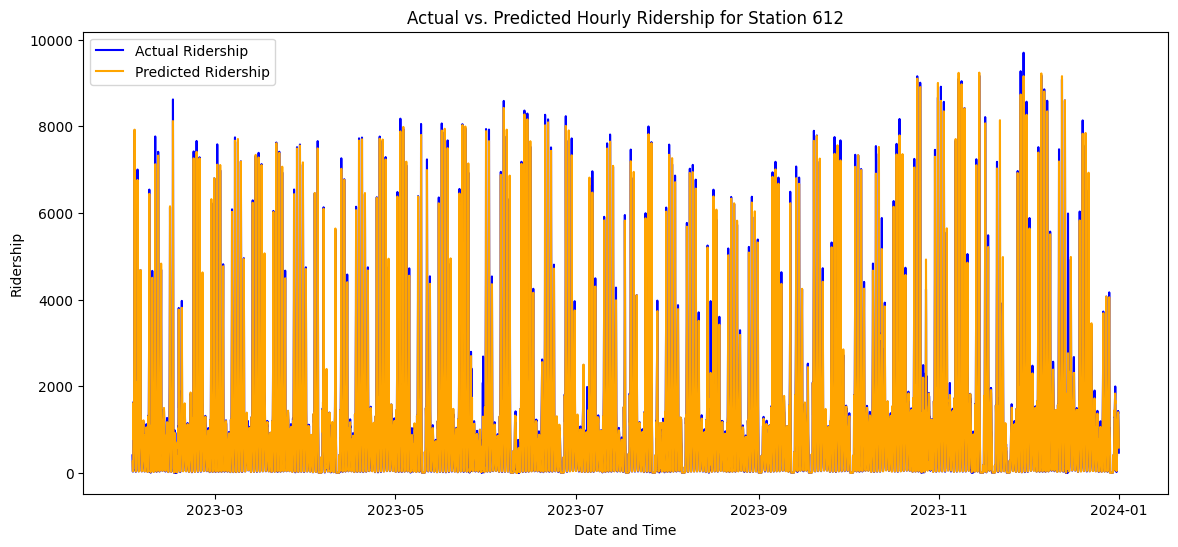

In [127]:
# Filter for the specific station ID
station_df = predictions_df[predictions_df['station_complex_id'] == station_id]

# Plot if data exists
if not station_df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(station_df.index, station_df['actual_ridership'], label='Actual Ridership', color='blue')
    plt.plot(station_df.index, station_df['predicted_ridership'], label='Predicted Ridership', color='orange')
    plt.xlabel('Date and Time')
    
    plt.ylabel('Ridership')
    plt.title(f'Actual vs. Predicted Hourly Ridership for Station {station_id}')
    plt.legend()
    plt.show()
else:
    print(f"No data available for station ID {station_id}. Please choose a different station.")



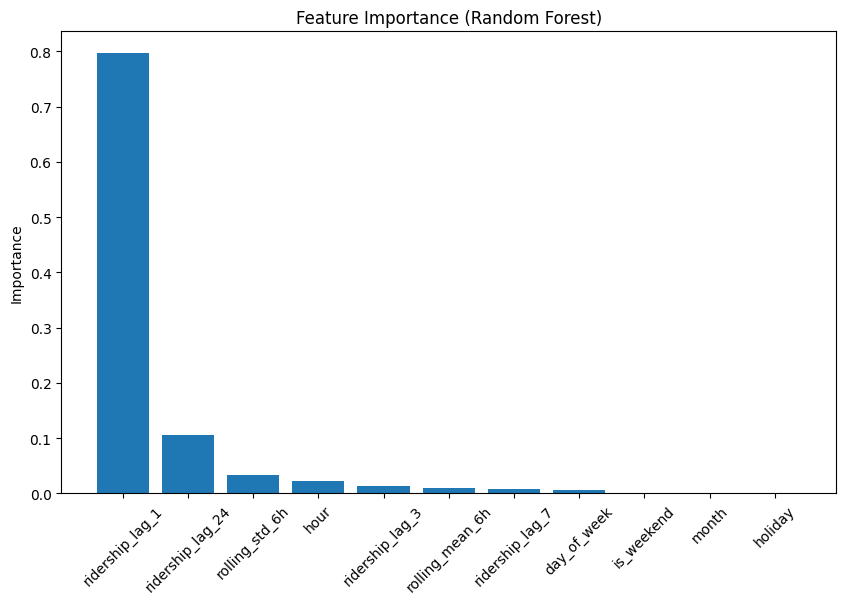

In [128]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

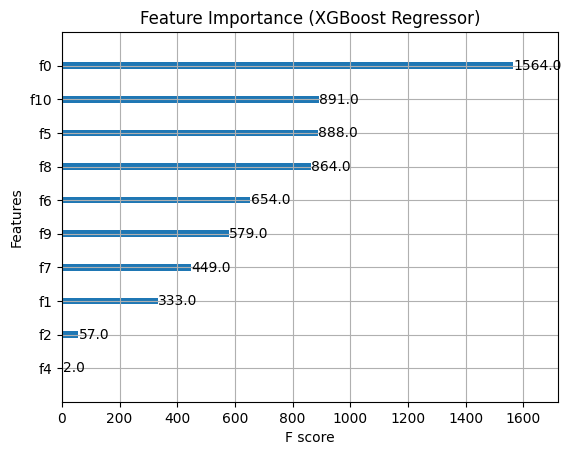

In [133]:
from xgboost import plot_importance

# Plot feature importance using the built-in function
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # Other options: 'weight', 'gain', 'cover'
plt.title("Feature Importance (XGBoost Regressor)")
plt.show()


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(predictions_df['actual_ridership'], predictions_df['predicted_ridership'])
mse = mean_squared_error(predictions_df['actual_ridership'], predictions_df['predicted_ridership'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((predictions_df['actual_ridership'] - predictions_df['predicted_ridership']) / predictions_df['actual_ridership'])) * 100

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 24.732255190941462
Mean Squared Error (MSE): 8664.390955250523
Root Mean Squared Error (RMSE): 93.08271029171058
Mean Absolute Percentage Error (MAPE): inf%


In [132]:
# Calculate sMAPE to handle zeros better
sMAPE = np.mean(2 * np.abs(predictions_df['actual_ridership'] - predictions_df['predicted_ridership']) / 
                (np.abs(predictions_df['actual_ridership']) + np.abs(predictions_df['predicted_ridership']))) * 100
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {sMAPE}%")


Symmetric Mean Absolute Percentage Error (sMAPE): 18.371800951239464%


In [130]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize XGBRegressor with some basic parameters
# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=24)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=24, reg_alpha=1, reg_lambda=1)


# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regressor MSE:", mse_xgb)

# Optionally, you can calculate RMSE and MAE as well
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regressor RMSE:", rmse_xgb)

from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Regressor MAE:", mae_xgb)


XGBoost Regressor MSE: 19947.47591664875
XGBoost Regressor RMSE: 141.2355334774105
XGBoost Regressor MAE: 45.32371427353635


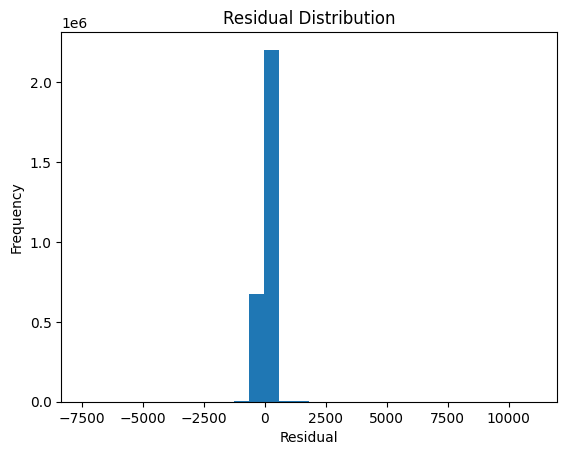

In [134]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_xgb
plt.hist(residuals, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


In [ ]:
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)